In [1]:
from network import *
import pickle

# Hyper Parameters
num_epochs = 12
batch_size = 100
learning_rate = 0.001

#CIFAR-10

train_dataset = dsets.CIFAR10(root = "./datasets/",train = True,transform = transforms.ToTensor(),download= True)
test_dataset = dsets.CIFAR10(root = "./datasets/",train = False,transform = transforms.ToTensor(),download= True)


#Data Loader

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,shuffle = False)



cnn = CNN2()
#xavier initalize
nn.init.xavier_normal(cnn.conv1[0].weight)
# nn.init.xavier_normal(cnn.conv1[0].bias)
cnn.cuda()



criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(),lr = learning_rate)

train_acc_container,test_acc_container = trainning(
    net = cnn, 
    train_loader = train_loader,
    
    test_loader = test_loader, 
    criterion = criterion,
    optimizer = optimizer, 
    num_epochs = num_epochs,
)

with open("CNN2_result.dat","wb") as f:
    pickle.dump([train_acc_container,test_acc_container],f)
    print("CNN2 data save")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/12], Train: 45.1600 Test: 45.0400
Epoch [1/12], Train: 54.1420 Test: 53.0800
Epoch [1/12], Train: 59.7220 Test: 59.1300
Epoch [1/12], Train: 62.7360 Test: 61.7700
Epoch [1/12], Train: 65.7500 Test: 64.7900
Epoch [2/12], Train: 69.4520 Test: 67.4800
Epoch [2/12], Train: 69.0520 Test: 65.9700
Epoch [2/12], Train: 72.5680 Test: 69.2100
Epoch [2/12], Train: 75.0680 Test: 71.7000
Epoch [2/12], Train: 75.7560 Test: 71.7600
Epoch [3/12], Train: 76.8560 Test: 71.7100
Epoch [3/12], Train: 78.3400 Test: 72.4300
Epoch [3/12], Train: 76.8820 Test: 71.3100
Epoch [3/12], Train: 80.0000 Test: 73.2600
Epoch [3/12], Train: 80.9020 Test: 74.5900
Epoch [4/12], Train: 81.8780 Test: 74.3700
Epoch [4/12], Train: 83.1480 Test: 74.6000
Epoch [4/12], Train: 83.9020 Test: 75.4400
Epoch [4/12], Train: 85.8760 Test: 76.1600
Epoch [4/12], Train: 85.7500 Test: 75.4500
Epoch [5/12], Train: 86.7880 Test: 75.7200
Epoch [5/12], Train: 

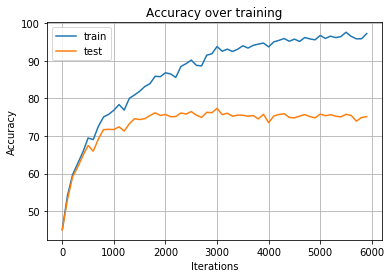

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_acc_container))*100,np.array(train_acc_container))
plt.plot(np.arange(len(test_acc_container))*100,np.array(test_acc_container))
plt.legend(["train","test"])
plt.grid()
plt.title("Accuracy over training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("CNN2.jpg")
plt.show()